<a href="https://colab.research.google.com/github/NaviinRaghav/unimentor/blob/main/Project_1_%E2%80%93_Climate_Change_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [3]:
# 1️⃣ Load dataset – set Year as index and clean column names
data = pd.read_csv("climate_data.csv")
data.columns = data.columns.str.strip()              # remove any extra spaces
data.set_index("Year", inplace=True)                 # make Year the index

# Check column names
print(data.columns)


Index(['Country', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)',
       'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population',
       'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)'],
      dtype='object')


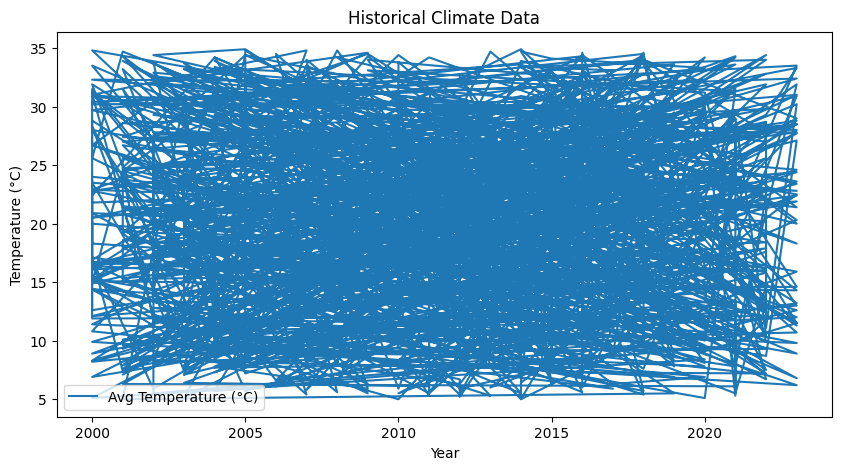

In [4]:
# 2️⃣ Plot the temperature trend
plt.figure(figsize=(10,5))
plt.plot(data.index, data["Avg Temperature (°C)"], label="Avg Temperature (°C)")
plt.title("Historical Climate Data")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# 3️⃣ Train-test split (use the correct column name)
train = data["Avg Temperature (°C)"][:-10]  # first N-10 years
test  = data["Avg Temperature (°C)"][-10:]  # last 10 years

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Avg Temperature (°C)   No. Observations:                  990
Model:                   ARIMA(5, 1, 0)   Log Likelihood               -3598.640
Date:                  Sun, 14 Sep 2025   AIC                           7209.280
Time:                          16:24:08   BIC                           7238.660
Sample:                               0   HQIC                          7220.452
                                  - 990                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8164      0.032    -25.463      0.000      -0.879      -0.754
ar.L2         -0.6516      0.040    -16.429      0.000      -0.729      -0.574
ar.L3         -0.4768      0.041    

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


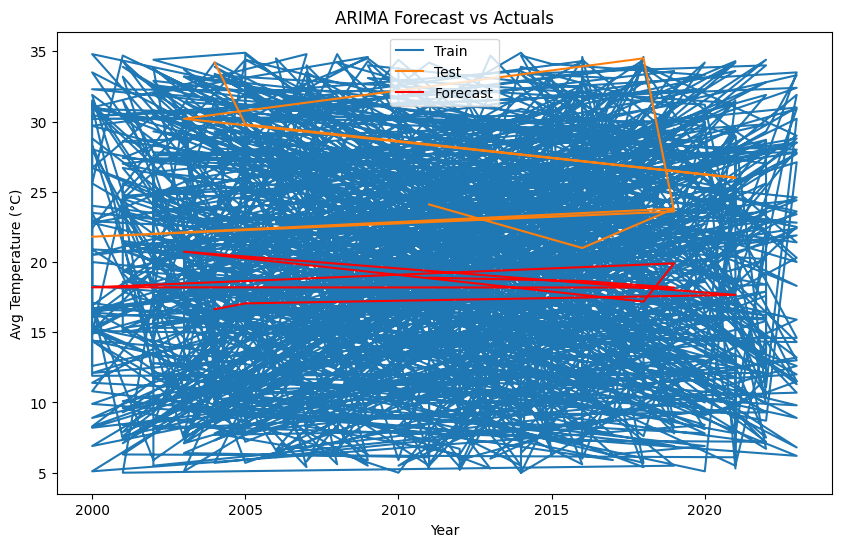

Mean Squared Error (MSE): 102.06036829317418


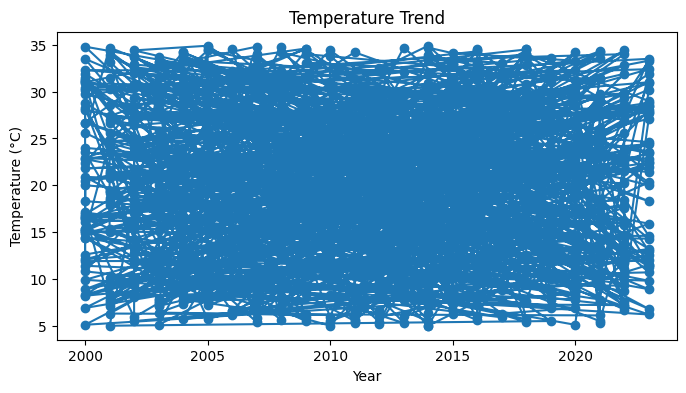

In [5]:
# 4️⃣ Build and fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# 5️⃣ Forecast for the length of the test set
forecast = model_fit.forecast(steps=len(test))
print("Forecast generated.")

# 6️⃣ Plot results
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast vs Actuals")
plt.xlabel("Year")
plt.ylabel("Avg Temperature (°C)")
plt.legend()
plt.show()

# 7️⃣ Calculate Mean Squared Error
mse = mean_squared_error(test, forecast)
print("Mean Squared Error (MSE):", mse)

# 8️⃣ Additional visualizations
# Temperature trend
plt.figure(figsize=(8,4))
plt.plot(data.index, data["Avg Temperature (°C)"], marker='o')
plt.title("Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

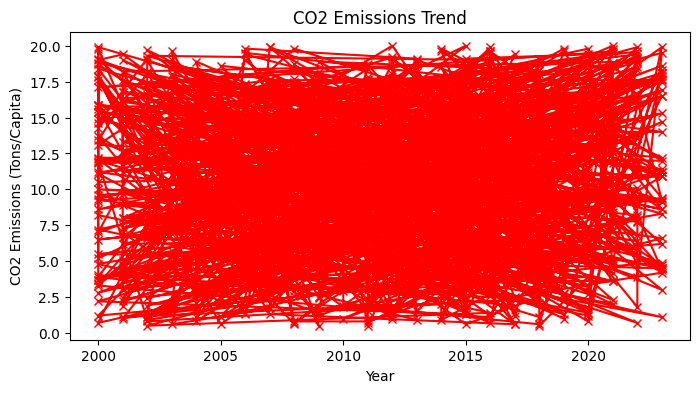

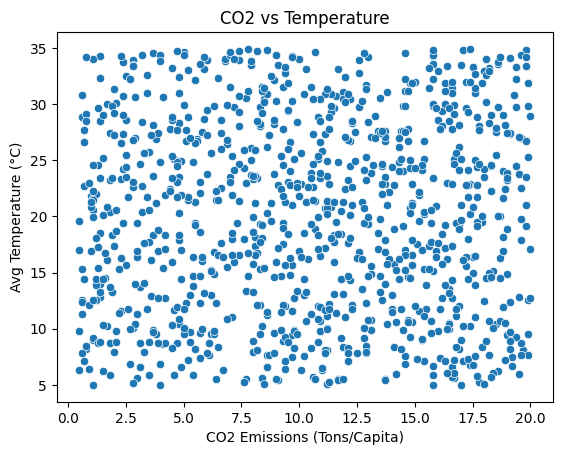

In [6]:
# CO2 Trend
plt.figure(figsize=(8,4))
plt.plot(data.index, data["CO2 Emissions (Tons/Capita)"], color='red', marker='x')
plt.title("CO2 Emissions Trend")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.show()

# Scatter Plot - CO2 vs Temperature
sns.scatterplot(x=data["CO2 Emissions (Tons/Capita)"], y=data["Avg Temperature (°C)"])
plt.title("CO2 vs Temperature")
plt.xlabel("CO2 Emissions (Tons/Capita)")
plt.ylabel("Avg Temperature (°C)")
plt.show()
